### **Análisis de Efectividad de los Hashtags para la cuenta Atraveler Teaher**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tabulate import tabulate

In [8]:
data=pd.read_csv('posts_atravelerteacher.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1129 non-null   float64
 1   caption         1112 non-null   object 
 2   timestamp       1129 non-null   object 
 3   ownerUsername   1129 non-null   object 
 4   locationName    1129 non-null   object 
 5   type            1129 non-null   object 
 6   productType     1129 non-null   object 
 7   firstComment    904 non-null    object 
 8   likesCount      1129 non-null   int64  
 9   commentsCount   1129 non-null   int64  
 10  videoPlayCount  1129 non-null   int64  
 11  videoViewCount  1129 non-null   int64  
 12  videoDuration   1129 non-null   float64
 13  hashtags/0      1129 non-null   object 
 14  hashtags/1      1129 non-null   object 
 15  hashtags/2      1129 non-null   object 
 16  hashtags/3      1129 non-null   object 
 17  hashtags/4      1129 non-null   o

In [ ]:
data['all_hashtags'] = data[[f'hashtags/{i}' for i in range(1, 29)]].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [ ]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), lowercase=True, token_pattern=None)
hashtag_matrix = vectorizer.fit_transform(data['all_hashtags'])
hashtag_counts = np.asarray(hashtag_matrix.sum(axis=0)).flatten()
hashtag_names = vectorizer.get_feature_names_out()


In [ ]:
hashtag_df = pd.DataFrame({'hashtag': hashtag_names, 'count': hashtag_counts})
hashtag_df = hashtag_df.sort_values(by='count', ascending=False)


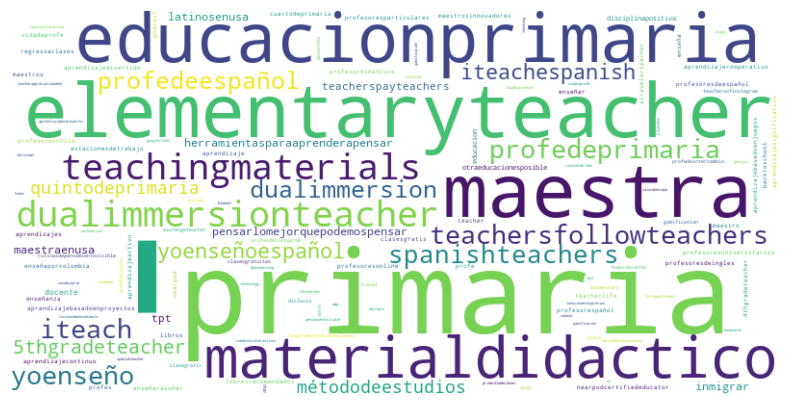

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(
    dict(zip(hashtag_df['hashtag'], hashtag_df['count']))
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
followerscount = 35226 
data['followersCount'] = followerscount
data['engagement_rate'] = (data['likesCount'] + data['commentsCount']) / data['followersCount'] * 100

hashtag_engagement = data.groupby('all_hashtags')['engagement_rate'].mean().sort_values(ascending=False)

In [ ]:
data['comments_to_likes'] = data['commentsCount'] / (data['likesCount'] + 1e-5)

In [ ]:
data['all_hashtags'] = data[[f'hashtags/{i}' for i in range(1, 29)]].apply(lambda x: ' '.join(x.dropna()), axis=1)
hashtag_engagement = data.groupby('all_hashtags')['engagement_rate'].mean().sort_values(ascending=False)

In [19]:
hashtag_engagement_df = hashtag_engagement.reset_index()
hashtag_engagement_df.columns = ['Hashtag', 'Engagement Rate']

In [ ]:
print("Top Hashtags por Retención")
print(tabulate(hashtag_engagement_df, headers='keys', tablefmt='presto'))

Top Hashtags por Retención
     | Hashtag                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   Engagement Rate
-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
data['hour'] = pd.to_datetime(data['timestamp']).dt.hour
timing_engagement = data.groupby('hour')['engagement_rate'].mean()

In [24]:
print("\nRetención por Hora")
print(timing_engagement)


Retención por Hora
hour
0     1.043814
1     0.807869
2     0.714233
3     0.679250
4     0.176006
6     0.569182
7     0.454210
8     0.232783
10    0.468404
11    0.732632
12    0.366057
13    0.403111
14    0.690027
15    0.811719
16    0.420144
17    1.459767
18    1.560915
19    0.650156
20    0.587178
21    0.713287
22    1.389756
23    1.951707
Name: engagement_rate, dtype: float64
